In [10]:
#importng necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,RMSprop, Adagrad
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [11]:
#LOAD DATASET
labels = ['Negative', 'Positive']
img_size = 120
def read_images(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

Dataset = read_images("C:\\Users\\Swetanshu's\\Desktop\\Crack Detection and Classification using CNN Model DL\\Dataset")

In [12]:
import cv2
import numpy as np

image_path = "C:\\Users\\Swetanshu's\\Desktop\\Crack Detection and Classification using CNN Model DL\\Dataset\\Positive"

def find_crack_length_depth(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(image, 100, 200)
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=50, minLineLength=100, maxLineGap=10)

    min_angle = -20
    max_angle = 20
    crack_lines = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi
        if angle > min_angle and angle < max_angle:
            crack_lines.append(line)

    longest_line = max(crack_lines, key=lambda line: np.linalg.norm(line[0][:2] - line[0][2:]))
    shortest_lines = []
    for line in crack_lines:
        if np.cross(line[0][:2] - longest_line[0][:2], longest_line[0][:2] - line[0][2:]) == 0:
            shortest_lines.append(line)

    depth = min(np.linalg.norm(line[0][:2] - line[0][2:]) for line in shortest_lines)
    length = np.linalg.norm(longest_line[0][:2] - longest_line[0][2:])

    return length, depth



Text(0.5, 1.0, 'Number of Images')

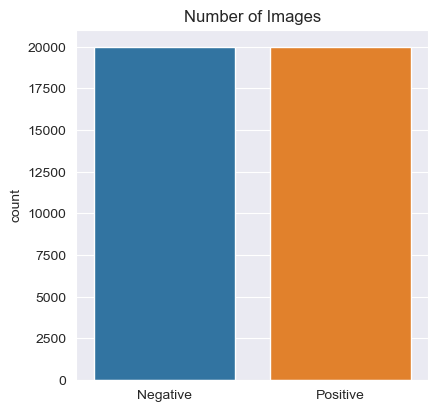

In [14]:
Im = []
for i in Dataset:
    if(i[1] == 0):
        Im.append("Negative")
    elif(i[1] == 1):
        Im.append("Positive")

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(x=Im)
axl.set_title("Number of Images")


In [15]:
#NORMALISATION OF IMAGE DATA
x = []
y = []

for feature, label in Dataset:
    x.append(feature)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 1)
x = x / 255
y = np.array(y)

(-0.5, 119.5, 119.5, -0.5)

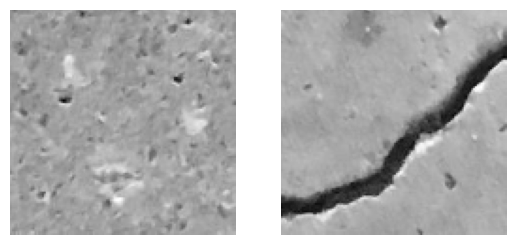

In [16]:
plt.subplot(1, 2, 1)
plt.imshow(x[1000].reshape(img_size, img_size), cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x[30000].reshape(img_size, img_size), cmap='gray')
plt.axis('off')

In [17]:
#CNN MODEL
model = Sequential()
model.add(Conv2D(64,3,padding="same", activation="relu", input_shape = x.shape[1:]))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 128)      0

In [18]:
#MODEL TRAINING
opt = Adam(lr=1e-5)

model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) 

history = model.fit(x, y, epochs = 15, batch_size = 128, validation_split = 0.25, verbose=1)

Epoch 1/15
235/235 [==============================] - 391s 2s/step - loss: 0.1179 - accuracy: 0.9434 - val_loss: 0.1107 - val_accuracy: 0.9535
Epoch 2/15
235/235 [==============================] - 617s 3s/step - loss: 0.0259 - accuracy: 0.9921 - val_loss: 0.0572 - val_accuracy: 0.9817
Epoch 3/15
235/235 [==============================] - 638s 3s/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.0530 - val_accuracy: 0.9816
Epoch 4/15
235/235 [==============================] - 675s 3s/step - loss: 0.0138 - accuracy: 0.9958 - val_loss: 0.0451 - val_accuracy: 0.9839
Epoch 5/15
235/235 [==============================] - 669s 3s/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.1527 - val_accuracy: 0.9567
Epoch 6/15
235/235 [==============================] - 862s 4s/step - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.1438 - val_accuracy: 0.9518
Epoch 7/15
235/235 [==============================] - 643s 3s/step - loss: 0.0078 - accuracy: 0.9974 - val_loss: 0.0139 - val_accuracy: 0.9946

In [19]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


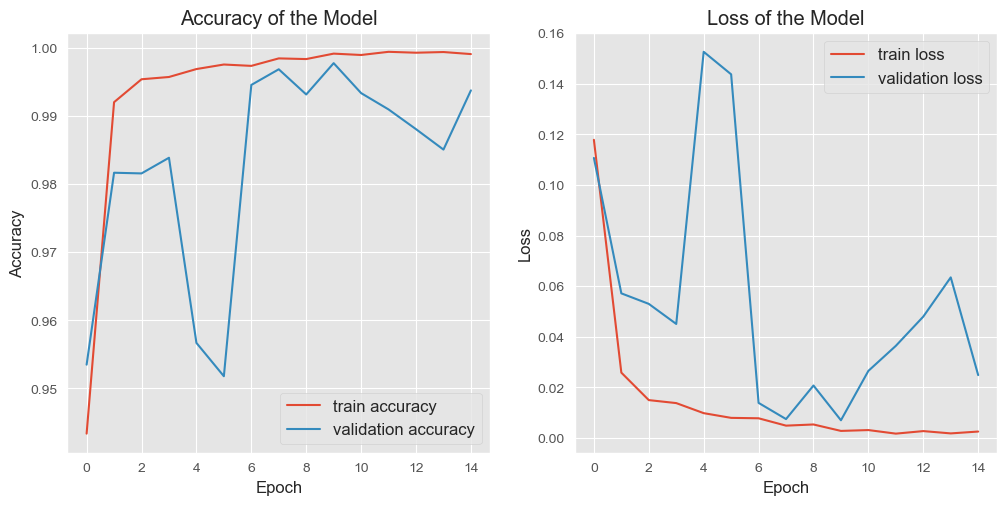

In [20]:
#GRAPHS
plt.figure(figsize=(12, 12))
plt.style.use('ggplot')
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of the Model')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right', prop={'size': 12})

plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the Model')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train loss', 'validation loss'], loc='best', prop={'size': 12})

In [21]:
#CLASSIFICATION REPORT
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the data using the model
y_pred = model.predict(x)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Generate classification report and confusion matrix
class_names = ['No Crack', 'Crack']
report = classification_report(y, y_pred, target_names=class_names)
matrix = confusion_matrix(y, y_pred)

print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(matrix)    

1250/1250 [==============================] - 125s 99ms/step
Classification Report:
              precision    recall  f1-score   support

    No Crack       1.00      1.00      1.00     20000
       Crack       1.00      1.00      1.00     20000

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

Confusion Matrix:
[[19999     1]
 [   62 19938]]
